In [1]:
import pickle
import numpy as np
import xgboost as xgb
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
xy_data_dir = '/Users/mmw/Documents/GitHub/ml_val/data_all/xy_data'
with open(xy_data_dir + '/x_tr.pkl', 'rb') as handle:
    x_tr = pickle.load(handle).fillna(0).iloc[:,5:]
with open(xy_data_dir + '/y_tr.pkl', 'rb') as handle:
    y_tr = pickle.load(handle).fillna(0).iloc[:,5:]
with open(xy_data_dir + '/x_val.pkl', 'rb') as handle:
    x_val = pickle.load(handle).fillna(0).iloc[:,5:]
with open(xy_data_dir + '/y_val.pkl', 'rb') as handle:
    y_val = pickle.load(handle).fillna(0).iloc[:,5:]
# with open(xy_data_dir + '/x_ts.pkl', 'rb') as handle:
#     x_ts = pickle.load(handle).fillna(0).iloc[:,5:]
# with open(xy_data_dir + '/y_ts.pkl', 'rb') as handle:
#     y_ts = pickle.load(handle).fillna(0).iloc[:,5:]
# 

In [7]:
for idx, item in enumerate(x_tr.columns):
    print(idx, item)

0 absacc
1 acc
2 agr
3 bm_ia
4 cashdebt
5 cashpr
6 cfp
7 cfp_ia
8 chatoia
9 chcsho
10 chempia
11 chinv
12 chpmia
13 convind
14 currat
15 currat
16 depr
17 divi
18 divo
19 dy
20 egr
21 ep
22 gma
23 grcapx
24 grltnoa
25 herf
26 hire
27 invest
28 lev
29 lgr
30 mve_ia
31 operprof
32 orgcap
33 pchcapx_ia
34 pchcurrat
35 pchdepr
36 pchgm_pchsale
37 pchquick
38 pchsale_pchinvt
39 pchsale_pchrect
40 pchsale_pchxsga
41 pchsaleinv
42 pctacc
43 ps
44 quick
45 rd
46 rd_mve
47 rd_sale
48 realestate
49 roic
50 salecash
51 saleinv
52 salerec
53 secured
54 securedind
55 sgr
56 sin
57 sp
58 tang
59 tb
60 aeavol
61 cash
62 chtx
63 cinvest
64 ear
65 roaq
66 roavol
67 roeq
68 rsup
69 stdacc
70 stdcf
71 chmom
72 dolvol
73 mom12m
74 mom1m
75 mom36m
76 mom6m
77 mvel1
78 turn


In [4]:
list(y_tr.columns)

['revt',
 'ebit',
 'ebitda',
 're',
 'epspi',
 'gma',
 'operprof',
 'quick',
 'currat',
 'cashrrat',
 'cftrr',
 'dpr',
 'pe',
 'pb',
 'roe',
 'roa',
 'roic',
 'cod',
 'capint',
 'lev',
 'revt_aoa',
 'ebit_aoa',
 'ebitda_aoa',
 're_aoa',
 'epspi_aoa',
 'gma_aoa',
 'operprof_aoa',
 'quick_aoa',
 'currat_aoa',
 'cashrrat_aoa',
 'cftrr_aoa',
 'dpr_aoa',
 'pe_aoa',
 'pb_aoa',
 'roe_aoa',
 'roa_aoa',
 'roic_aoa',
 'cod_aoa',
 'capint_aoa',
 'lev_aoa',
 'revtq',
 'req',
 'epspiq',
 'quickq',
 'curratq',
 'cashrratq',
 'peq',
 'roeq',
 'roaq',
 'revtq_aoa',
 'req_aoa',
 'epspiq_aoa',
 'quickq_aoa',
 'curratq_aoa',
 'cashrratq_aoa',
 'peq_aoa',
 'roeq_aoa',
 'roaq_aoa',
 'revtq_qoq',
 'req_qoq',
 'epspiq_qoq',
 'quickq_qoq',
 'curratq_qoq',
 'cashrratq_qoq',
 'peq_qoq',
 'roeq_qoq',
 'roaq_qoq']

[20:56:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


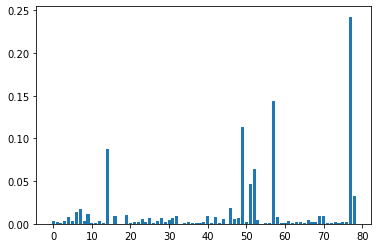

revt 0.9017340197447046
[20:57:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


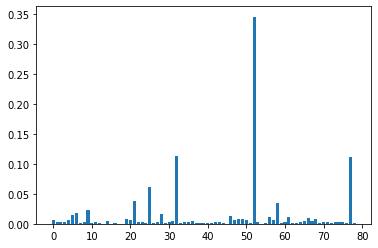

ebit 0.8207306493090383
[20:58:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


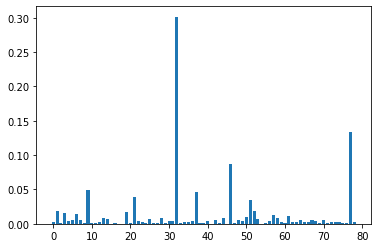

ebitda 0.853729140114987
[20:59:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


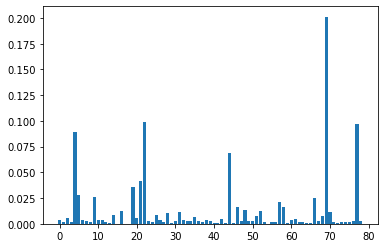

re 0.6749399213566935
[21:01:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


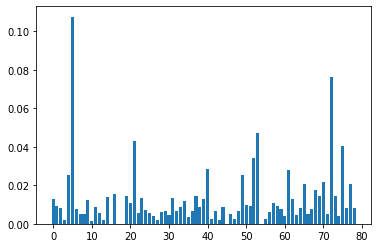

epspi 0.23288606042367632
[21:02:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


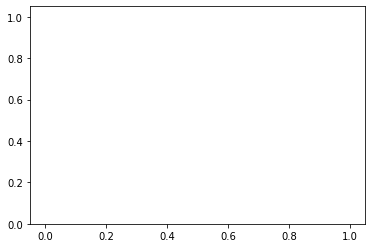

gma -0.00078172126112519
[21:02:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


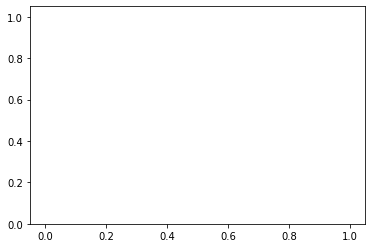

operprof 0.0
[21:02:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


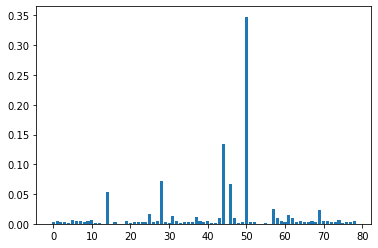

quick 0.025103229231198454
[21:03:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


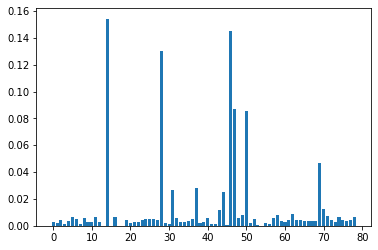

currat 0.02512121205325224
[21:04:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


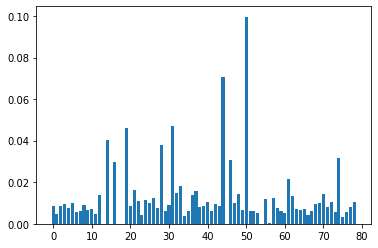

cashrrat 0.5146634974783089
[21:05:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


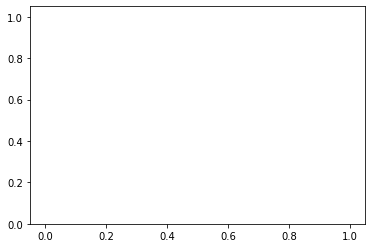

cftrr -0.0008847096202411198
[21:06:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


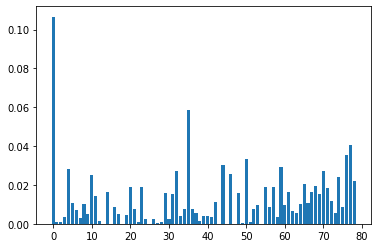

dpr -0.08606167243244967
[21:07:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


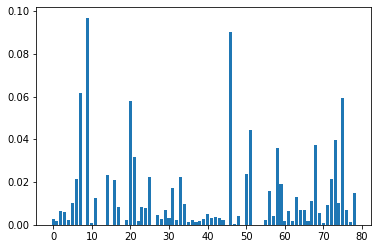

pe -0.08587644264717542
[21:08:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


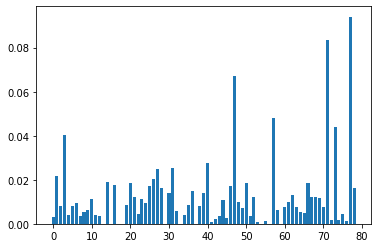

pb -0.041060947651059054
[21:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


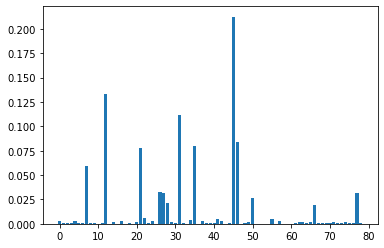

roe -0.8173055205051456
[21:10:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


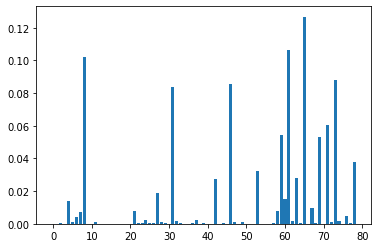

roa -64.66983928609984
[21:11:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


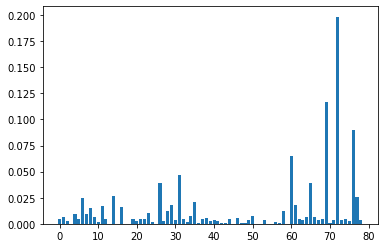

roic 0.0186364621637769
[21:12:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


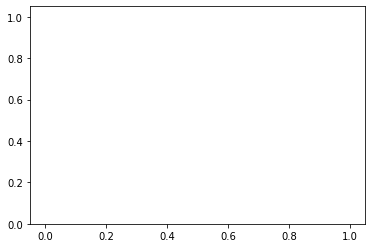

cod -0.07927981392165107
[21:12:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


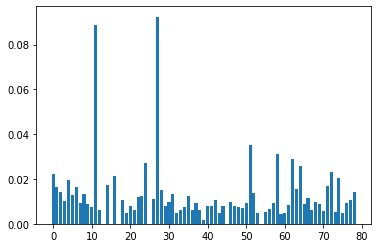

capint 0.5862706457798587
[21:13:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


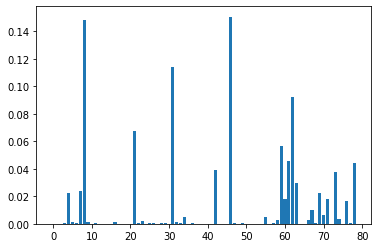

lev -6.478961531340398
[21:14:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


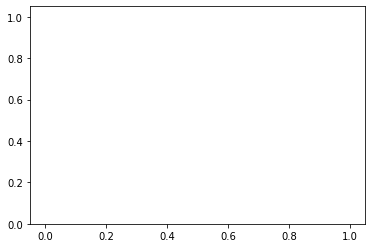

Cannot do revt_aoa!
[21:14:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


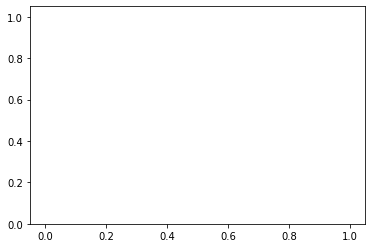

ebit_aoa -1.5556727641641288e-05
[21:15:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


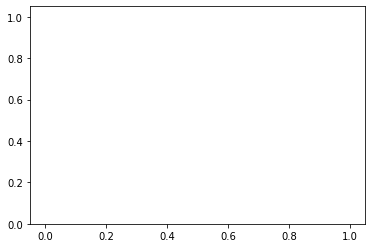

ebitda_aoa -0.0007502324304990982
[21:15:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


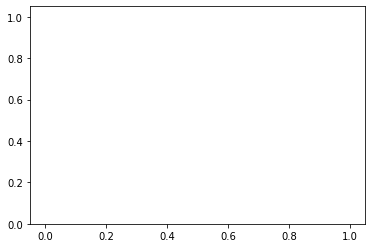

re_aoa -0.0007142163226137033
[21:15:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


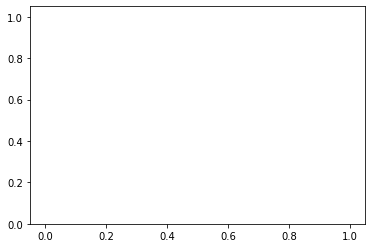

epspi_aoa -0.0008734733533799499
[21:16:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


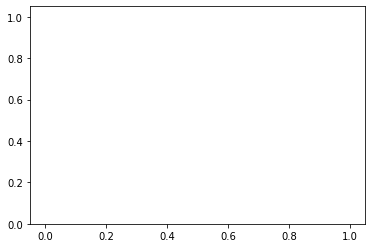

gma_aoa -0.0002894310305325831
[21:16:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


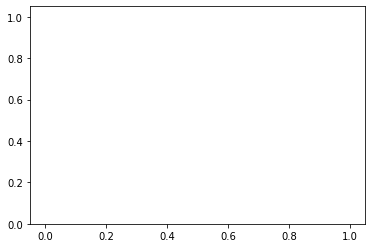

operprof_aoa 0.0
[21:16:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


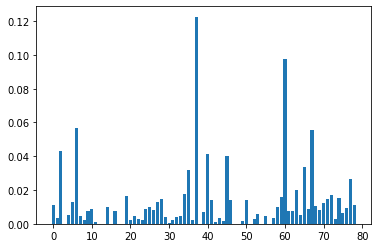

quick_aoa 0.24454307736476244
[21:17:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


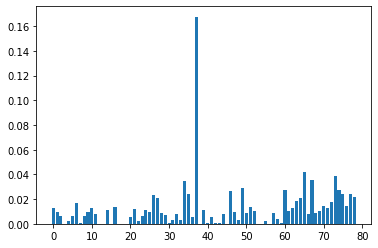

currat_aoa 0.3548539453627575
[21:18:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


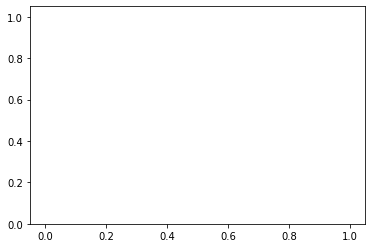

Cannot do cashrrat_aoa!
[21:18:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


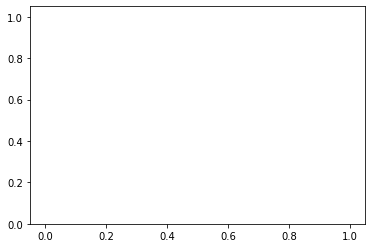

cftrr_aoa -0.0001941956485316254
[21:19:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


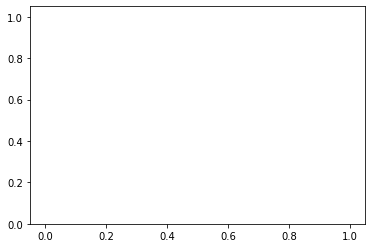

dpr_aoa -6.634576134767478e-05
[21:19:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


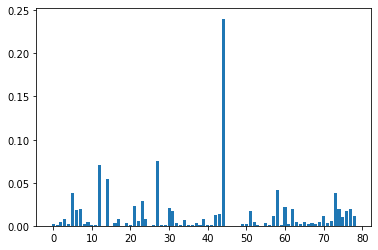

pe_aoa -0.11077171045093959
[21:20:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


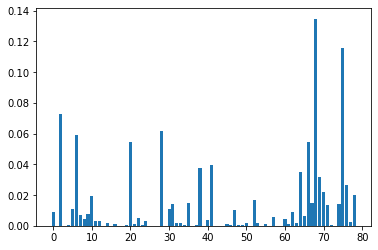

pb_aoa -0.4289774278265164
[21:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


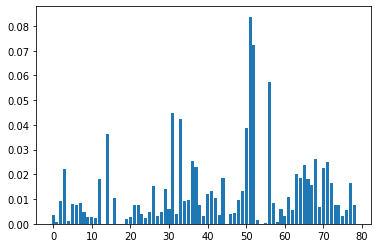

roe_aoa -0.05070223661707396
[21:22:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


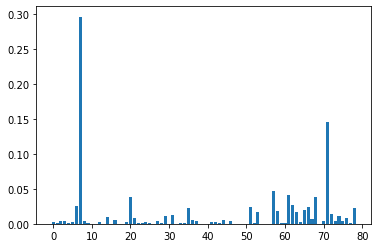

roa_aoa -0.04231254110248828
[21:23:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


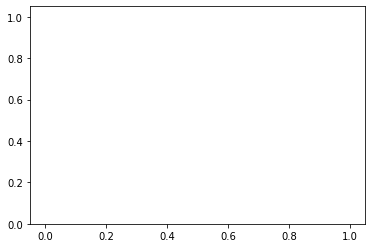

roic_aoa -4.206261522798904e-05
[21:23:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


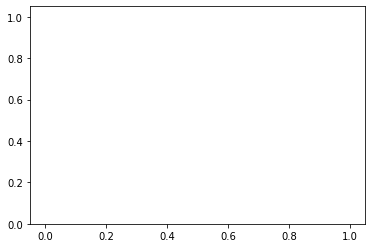

cod_aoa -7.851990282348176e-05
[21:24:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


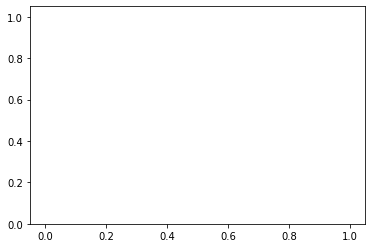

Cannot do capint_aoa!
[21:24:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


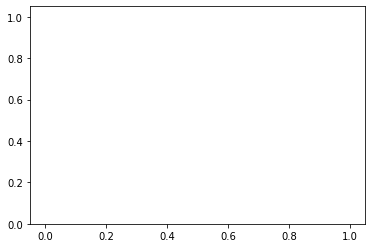

lev_aoa -0.001368132514018905
[21:24:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


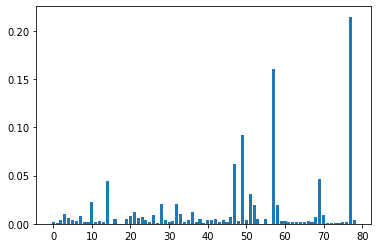

revtq 0.8836724462593062
[21:25:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


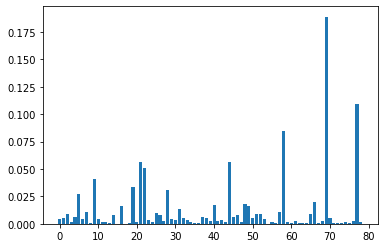

req 0.7220954557001948
[21:26:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


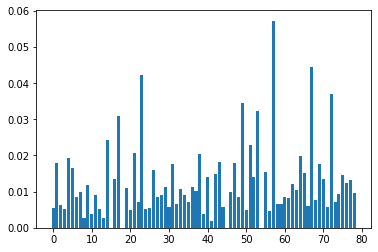

epspiq 0.17837821235559792
[21:27:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


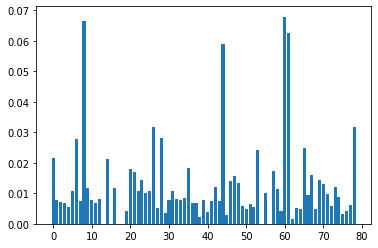

quickq 0.4301137334632994
[21:29:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


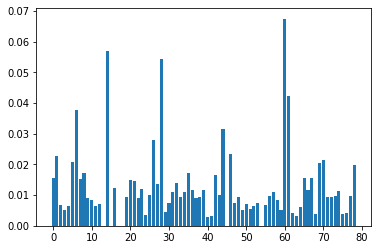

curratq 0.45240577635235524
[21:30:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


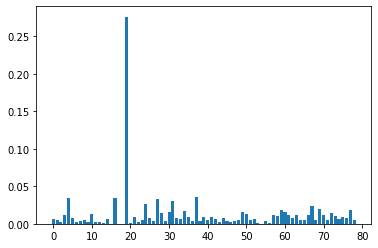

cashrratq 0.12105712274050884
[21:31:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


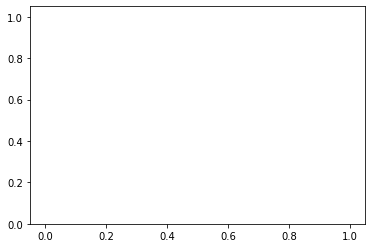

Cannot do peq!
[21:31:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


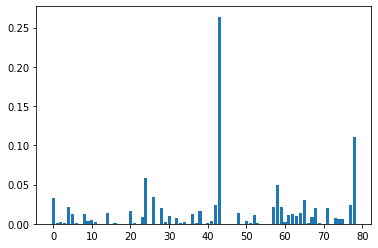

roeq -0.06286349782667178
[21:32:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


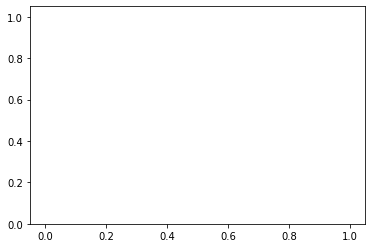

Cannot do roaq!
[21:32:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


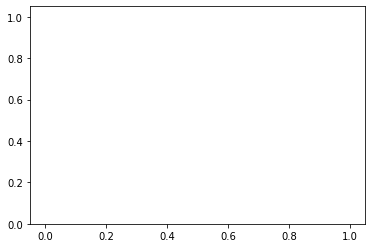

Cannot do revtq_aoa!
[21:33:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


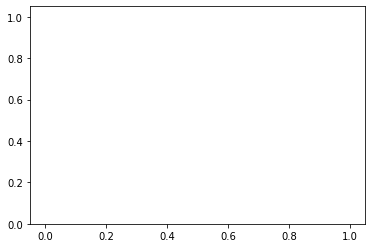

req_aoa -0.00044186210036745166
[21:33:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


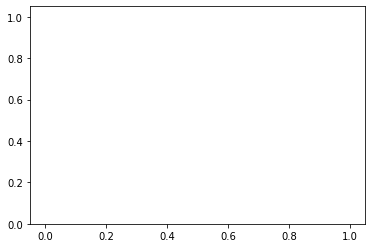

epspiq_aoa -0.0017859890387652566
[21:33:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


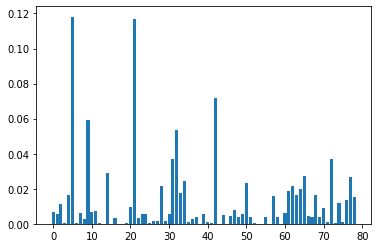

quickq_aoa -0.12126620371262531
[21:34:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


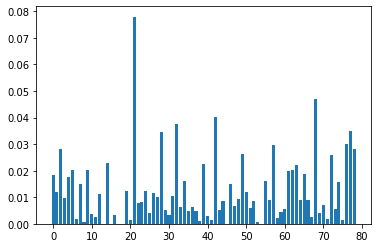

curratq_aoa 0.09864343952550514
[21:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


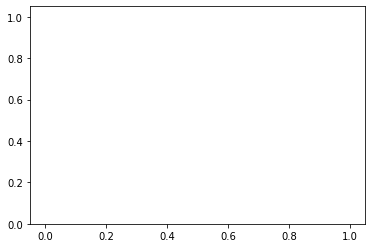

Cannot do cashrratq_aoa!
[21:35:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


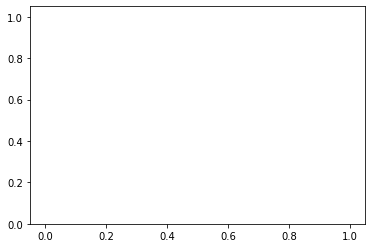

peq_aoa -2.013601386541275e-05
[21:36:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


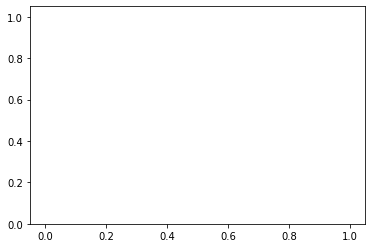

roeq_aoa -2.215124136761837e-05
[21:36:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


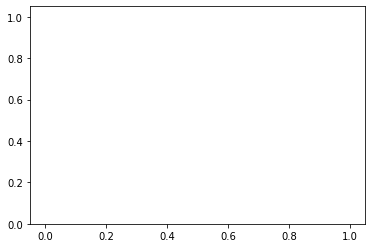

roaq_aoa -3.6002204232499224e-05
[21:36:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


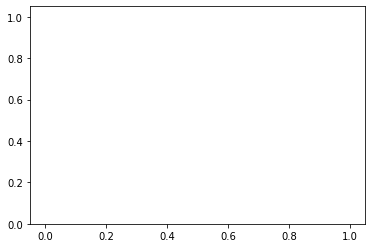

Cannot do revtq_qoq!
[21:44:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


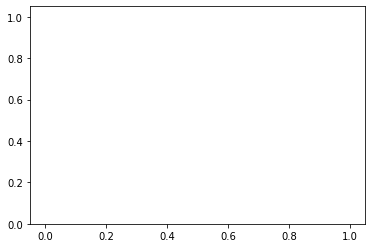

req_qoq -0.008088610002869201
[21:45:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


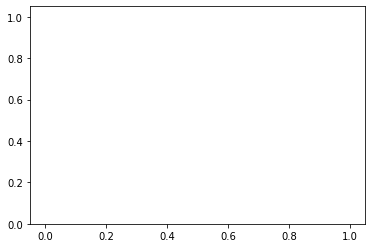

epspiq_qoq -0.0018249399396887966
[21:45:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


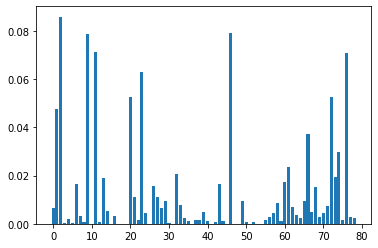

quickq_qoq -0.7292418703875627
[21:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


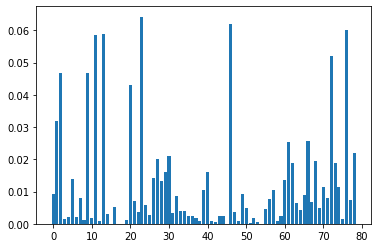

curratq_qoq -0.4689041239624181
[21:47:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


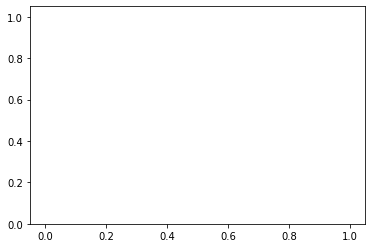

Cannot do cashrratq_qoq!
[21:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


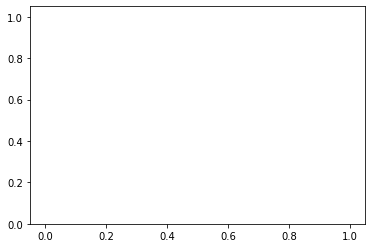

peq_qoq -7.909318518883879e-05
[21:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


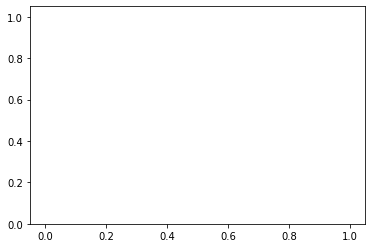

roeq_qoq -2.7414068231923494e-05
[21:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/mmw/Documents/Virtualenvs/rloe/lib/python3.7/site-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


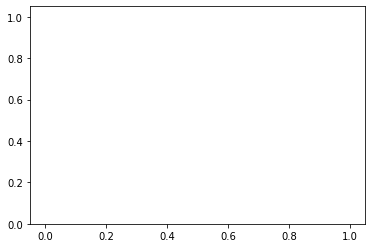

roaq_qoq -1.8140387196607932e-05


In [5]:
mod = xgb.XGBRegressor(
    max_depth=6,
    n_estimators=100, 
    min_child_weight=5,
    gamma=0.1,
    learning_rate=0.1
) 

oosr2 = {}
for item in y_tr.columns:
    try:
        mod.fit(x_tr.values, y_tr[item].values)
        predictions = mod.predict(x_val.values)
        y_true = y_val[item].values 
        # plot
        plt.bar(range(len(mod.feature_importances_)), mod.feature_importances_)
        plt.show()
        y_true[y_true==np.inf] = 0
        y_true[y_true==np.NINF] = 0
        y_true[y_true==np.NaN] = 0
        oosr2[item] = sklearn.metrics.r2_score(y_true, predictions)
        print(item, sklearn.metrics.r2_score(y_true, predictions))
    except:
        print(f'Cannot do {item}!')